In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison and bool values

In [2]:
x = 3
y = 4
x > y

False

In [3]:
10/2 != y

True

In [4]:
'Dog' > 'Cat'

True

In [5]:
'Dog' > 'Catastrophe' > 'Cat'

True

In [6]:
a = np.arange(11, 50)
a

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49])

In [7]:
a > 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [8]:
a == 15

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [9]:
def teen(x):
    return 13 <= x <= 19

[teen(10), teen(15), teen(20)]

[False, True, False]

In [10]:
ages = Table().with_column('Age', a)
ages = ages.with_column('Teenager', ages.apply(teen, 'Age'))
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


## Combining bools

In [11]:
[x, y]

[3, 4]

In [12]:
x < 2 or y > 4

False

In [13]:
not (x < 2 or x > 4)

True

In [14]:
True + True

2

In [15]:
(3 > 2) + (2 > 1)

2

In [16]:
False + False + False

0

In [17]:
sum([False, True, True, False, True])

3

In [18]:
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


In [19]:
ages.column(1)

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [20]:
sum(ages.column(1))

7

## Predicates

In [21]:
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


In [22]:
still_young = are.between(35, 40)
ages.where('Age', still_young)

Age,Teenager
35,False
36,False
37,False
38,False
39,False


In [23]:
still_young(38)

True

In [24]:
still_young(40)

False

In [25]:
ages.apply(still_young, 'Age')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [26]:
sum(ages.apply(still_young, 'Age'))

5

In [27]:
ages.where('Age', teen)

Age,Teenager
13,True
14,True
15,True
16,True
17,True
18,True
19,True


## Choice

In [28]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

In [29]:
np.random.choice(two_groups, 10)

array(['treatment', 'treatment', 'treatment', 'treatment', 'treatment',
       'control', 'treatment', 'treatment', 'control', 'treatment'], 
      dtype='<U9')

In [30]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'control', 'control', 'control',
       'treatment', 'control', 'treatment', 'treatment', 'control'], 
      dtype='<U9')

In [31]:
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'treatment', 'control', 'treatment',
       'control', 'control', 'treatment', 'treatment', 'treatment'], 
      dtype='<U9')

In [32]:
outcomes

array(['control', 'control', 'treatment', 'control', 'treatment',
       'control', 'control', 'treatment', 'treatment', 'treatment'], 
      dtype='<U9')

In [33]:
outcomes == 'control'

array([ True,  True, False,  True, False,  True,  True, False, False, False], dtype=bool)

In [34]:
# sum(outcomes)

In [35]:
sum(outcomes == 'control')

5

In [36]:
sum(outcomes == 'treatment')

5

## Discussion Question

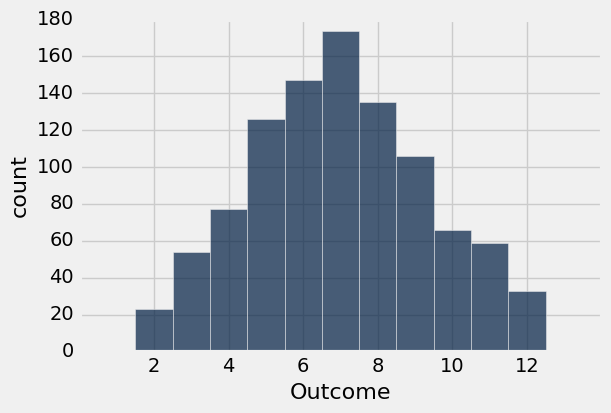

In [37]:
outcomes = np.random.choice(np.arange(6)+1, 1000) + np.random.choice(np.arange(6)+1, 1000)
Table().with_column("Outcome", outcomes).group(0).bar('Outcome')

## Print

In [38]:
def double(x):
    print('doubling', x)
    return 2 * x

def square(x):
    print('squaring', x)
    return x * x

double(square(double(5)))

doubling 5
squaring 10
doubling 100


200

In [39]:
print('one', end=' long ')
print('line')

one long line


## Conditional Statements

In [40]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
-3 is negative
0 is zero


In [41]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 1e-15:
        print('positive')
    elif x < -1e-15:
        print('negative')
    elif x == 0:
        print('zero')
    else:
        print('really close to zero')

sign(3)
sign(-3)
sign(0)
sign(2**0.5 * 2 **0.5 - 2)

3 is positive
-3 is negative
0 is zero
4.440892098500626e-16 is really close to zero


## For Statements

In [42]:
np.append(make_array(1, 2, 3), 4)

array([1, 2, 3, 4])

In [43]:
np.append(make_array(1, 2, 3), 'four')

array(['1', '2', '3', 'four'], 
      dtype='<U21')

In [44]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [45]:
np.arange(4)

array([0, 1, 2, 3])

In [46]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [47]:
coin = make_array('heads', 'tails')
np.random.choice(coin)

'heads'

In [48]:
sum(np.random.choice(coin, 100) == 'heads')

52

In [49]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'heads'))
num_heads

array([47])

In [50]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'heads'))
num_heads

array([47, 49])

In [51]:
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'heads'))
num_heads

array([47, 49, 47, ..., 44, 55, 49])

In [52]:
len(num_heads)

10002

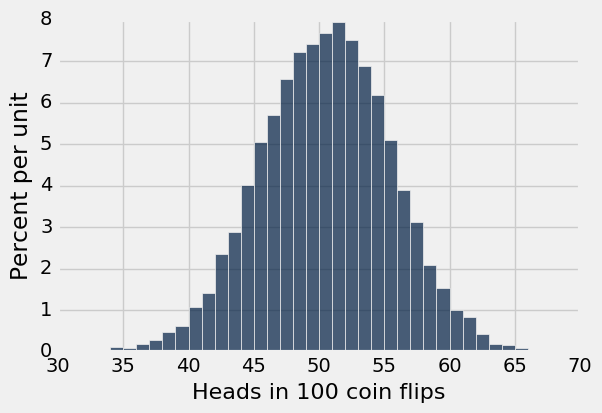

In [53]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [54]:
most = t.group(0).where(0, are.between(40, 60))
most

Heads in 100 coin flips,count
40,107
41,141
42,236
43,287
44,401
45,506
46,571
47,656
48,721
49,741


In [55]:
sum(most.column('count')) / t.num_rows * 100

95.550889822035586